In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kolosovanatoliy/probabilty-solutions-beta-scrambles")

print("Path to dataset files:", path)

100%|██████████| 1.63k/1.63k [00:00<00:00, 2.07MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kolosovanatoliy/probabilty-solutions-beta-scrambles/versions/2


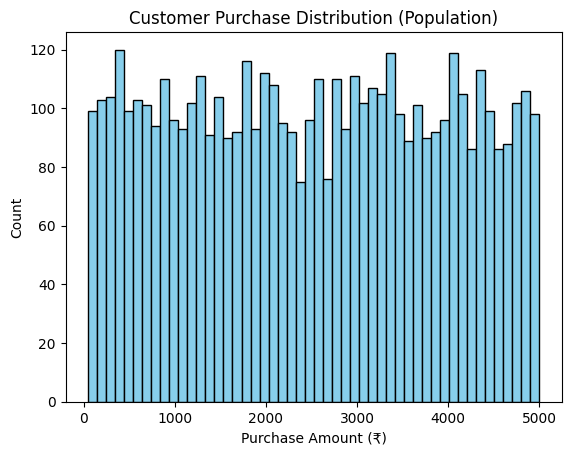

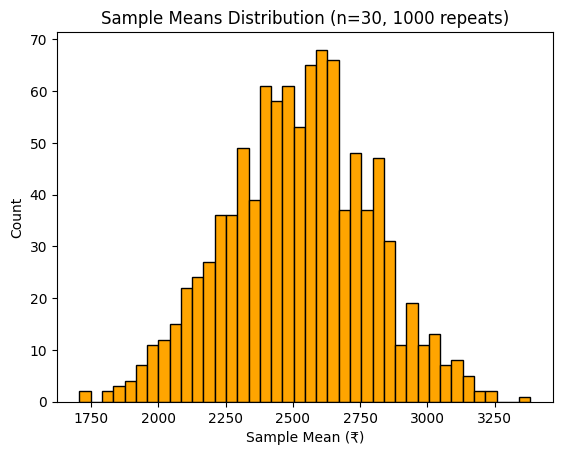

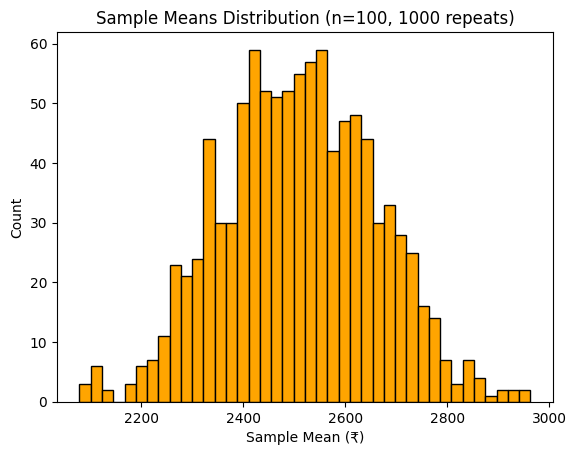

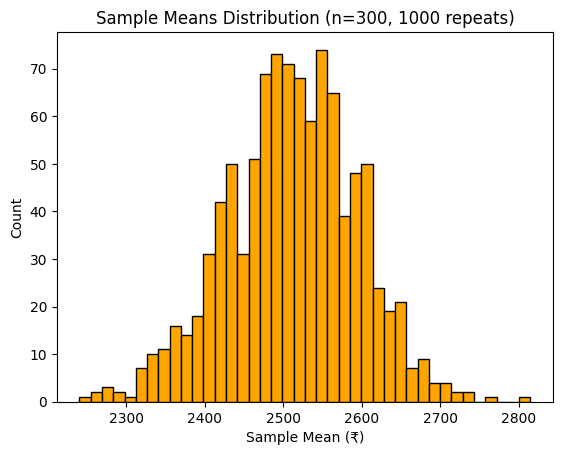

Population Statistics
Mean: ₹2509.32
Median: ₹2525.04
Variance: 2055457.19
Standard Deviation: 1433.69

Sample size 30: mean of sample means = 2508.66, std dev = 252.80
Sample size 100: mean of sample means = 2511.18, std dev = 142.30
Sample size 300: mean of sample means = 2509.54, std dev = 83.27

Insight: Larger sample sizes give more stable estimates (lower variability).

Enter a sample size to test: 100


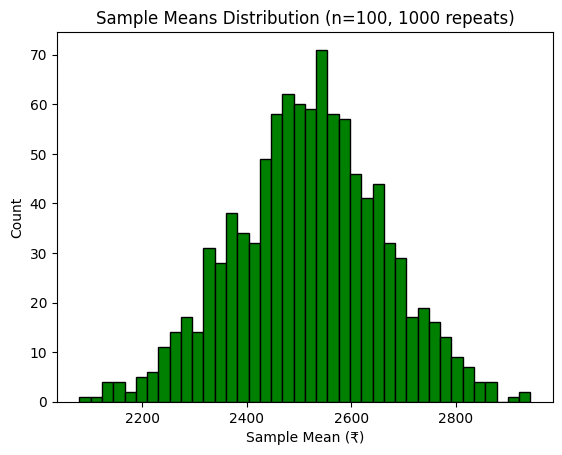

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
purchase_data = np.random.uniform(50, 5000, 5000)
df = pd.DataFrame(purchase_data, columns=["PurchaseAmount"])
plt.hist(df["PurchaseAmount"], bins=50, color="skyblue", edgecolor="black")
plt.title("Customer Purchase Distribution (Population)")
plt.xlabel("Purchase Amount (₹)")
plt.ylabel("Count")
plt.show()

def get_sample_means(sample_size, repeats=1000):
    sample_means = []
    for _ in range(repeats):
        sample = np.random.choice(df["PurchaseAmount"], size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

sample_sizes = [30, 100, 300]

for n in sample_sizes:
    means = get_sample_means(n)
    plt.hist(means, bins=40, color="orange", edgecolor="black")
    plt.title(f"Sample Means Distribution (n={n}, 1000 repeats)")
    plt.xlabel("Sample Mean (₹)")
    plt.ylabel("Count")
    plt.show()

print("Population Statistics")
print(f"Mean: ₹{df['PurchaseAmount'].mean():.2f}")
print(f"Median: ₹{df['PurchaseAmount'].median():.2f}")
print(f"Variance: {df['PurchaseAmount'].var():.2f}")
print(f"Standard Deviation: {df['PurchaseAmount'].std():.2f}\n")

for n in sample_sizes:
    means = get_sample_means(n)
    print(f"Sample size {n}: mean of sample means = {np.mean(means):.2f}, "
          f"std dev = {np.std(means):.2f}")

print("\nInsight: Larger sample sizes give more stable estimates (lower variability).")

user_n = int(input("\nEnter a sample size to test: "))
user_means = get_sample_means(user_n)

plt.hist(user_means, bins=40, color="green", edgecolor="black")
plt.title(f"Sample Means Distribution (n={user_n}, 1000 repeats)")
plt.xlabel("Sample Mean (₹)")
plt.ylabel("Count")
plt.show()
